## Introduction

The first papers published in Machine Learning came during the 1950s, one could argue that it started with Alan Turing’s Computing Machinery and Intelligence[1]. The invention of the perceptron [add reference] in 1957 by Frank Rosenblatt generated some media buzz with publications in the New Yorker in 1958 about how it could tell a cat from a dog [2]. I recently re-gained a lot of interest due to the fact that data became a commodity now and our computers are strong enough to analyze it. Even a new profession, Data Science, is gaining popularity due to it, as we can see from Figure 1 in which blue is Machine Learning and Red is Data Science.

![Google Trends](trend.png)

                            Figure 1 - Google Trends Report on Machine Learning and Data Science

Machine Learning has application in multiple industries such as credit scoring, fraud detection, image recognition, text based sentiment analysis, filter email spam and so many others. Manufacturing is also evolving with machine learning algorithms controlling furnaces[3] for achieving its best performance, learning from real data from the furnace instead of theory, since its behavior is not always as expected.

Due to its fast adoption and strong impact, it is important to understand what Machine Learning actually does and it's application. The purpose of this project is to go over what Machine Learning, focusing on supervised learning and 2 basic algorithms: Linear Regression and Logistic Regression.

### Machine Learning
    
Machine Learning is a subset of Artificial Intelligence. It is a field deeply related to Statistics and Computer Science in which computers apply statistical learning techniques to identify patterns in the data provided. There are three types of learning: supervised, unsupervised and reinforcement.

### Supervised Learning

It can be interpreted as a statistical and optimization problem that we want to maximize the quality of our prediction $\hat y$ in respect to an event $y$, modeling the event as dependent of a set of inputs $X$.
 
For example, suppose we want to estimate the price of a group of houses in a city. Let $y_i$ be the price of house $i$ and $X_i$ an array of variables that influence the price of house such as Lot Size, number of bedrooms, number of bathrooms, number of floors, the neighborhood and etc. Using this group of variables, we can train a Machine Learning model that takes a dataset $Xy$ to use as input to train it in a way that if given a new house $j$ with characteristics $Xj$ it can make a prediction of how much that house would cost.
 
This type of problem is called Regression. It takes a set of characteristics $X$ and tries to predict quantitative value $y$. It is used frequently in the industry, such as predicting the optimal price of a product for a given customer. Maximizing the probability that the customer would buy that product without cutting the margin that much. Or to predict how much a furnace will produce given a set of controllable and uncontrollable inputs in order to find the optimal production parameters.
 
The other kind of supervised learning problem is called Classification. It works in a very similar way as the regression problem, but this time, our response variable $y$ is a label, or a class. For example, predicting if a tumor is benign or not. Let $y_i$ be an integer {0, 1} . If $y = 1$ the tumor is malignant if $y = 0$ it is benign. Given a set of variables such as tumor radius, texture, perimeter, smoothness, symmetry and etc. Using the data other cases of tumor patients $P$, a Machine Learning Algorithm can use the patterns observed in the group of patients $P$ so that when examining a patient $P_i$ the model can predict if the tumor is malignant or benign using the patient’s characteristics $X_i$

Such types of problems are very common in financial and banking industries to give the probability of a client defaulting, which can be used in order to decide whether or not to give that specific client credit and a cross a multitude of other sectors with fraud detection, churn prediction and which product to advertise. Every one of those problems tries to predict the outcome of an specific event for a specific user, client or potential customer, making it an incredibly valuable decision support tool.
 
The focus of this report is to give an overview of how supervised learning works. Given its rising use and incredible value, it is important to understand what is it doing "under the hood". The report will go through the basic algorithms in order to understand how those models work.

### Unsupervised learning

Unsupervised learning is when we only have the X dataset, but no response variable Y. In this type of problem, the algorithm tries to cluster the X dataset together in groups based on the similarity of each data-point

### Reinforcement Learning

Reinforcement learning is when for a certain environment we want to map which actions to make, given that environment state. In this case, the objective is not to estimate the function that maps $X$ to $Y$ but the one that maps $S$ states to $A$ actions. Each pair $(S, A)$ is associated with a reward and it is usually used for game theory.
 
### Linear Regression

Going back to the house price model. Let's suppose that a house price $y$ is solely dependent on its lot size $x$. Plotting a group of houses we have the following graph:

![House Prices](house_price_graph.png)


                                                Figure 2 - house price by lot size

What a linear regression does is to find the line that best fits the dataset. The best line is the one that minimizes the error in our prediction. That way, for a given lot size, we can predict - with some error - the price $y$. Adding another variable, number of floors, for example, we now have a 3D graph and the linear regression now finds the plane that minimizes the error. Generally, given a vector of inputs $X$, we predict the output $\hat Y$ via the equation:

$$ \hat Y = \beta_0 + \sum_{i=1}^{p}X_i\beta_i$$

The term $\beta_0$ is the intercept. In machine learning it is also known as the bias. To make the notation and calculation simpler, it is often added the constant variable 1 to the vector of inputs $X_i^T=(1, X1i, X2i, X3i, . . . , Xpi)$. This way, we can include 0in the vector of coefficients and re-write the linear model in vector form:

$$ \hat Y = X^T\beta$$
  
Now that we have our model, we must fit the training data to it. There is a lot of different methods to accomplish this, but the most common is using the least squares method, in which we find the coefficients that minimize the residual sum of squares

$$ RSS(\beta) = \sum (y_i - x_i^T\beta)2 $$

In matrix notation:
$$ RSS(\beta) = (y- X\beta)T(y- X\beta) $$

Differentiating with respect to we get the normal equations: 

$$ X^T(y -X\beta) = 0$$

If $X^TX$ is non singular, the solution is:
$$ \beta  = (X^TX)^{-1}X^Ty$$

The Python implementation would look like the following:


In [1]:
import numpy as np

def linear_regression(X, y):
    """ 
    Fits the data into a linear function
    
    Parameters
    ----------
    X: array_like
        Data containing the dependent variables
    
    y: array_like
        1-D array with the response variable

    Returns
    -------
    
    betas: Series
        ndarray containing the coefficients of the linear function

    """
    # insert the column of 1s to find the linear intercept (beta 0)
    X = np.vstack([np.ones(len(X)), X]).T
    
    XT         = np.transpose(X)
    XTX        = np.dot(XT, X)
    XTX_inv    = np.linalg.inv(XTX)
    XTX_inv_XT = np.dot(XTX_inv, XT)
    beta       = np.dot(XTX_inv_XT, y)
    
    return beta

In [2]:
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([2, 1, 3, 4, 3, 6, 4, 6, 7])

beta = linear_regression(X, y)
beta

array([0.75, 0.65])

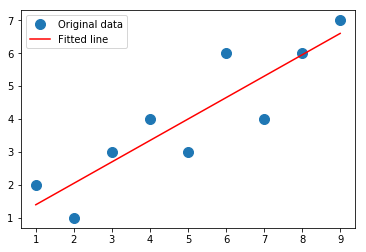

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(X, y, 'o', label='Original data', markersize=10)
plt.plot(X, beta[0] + beta[1]*X, 'r', label='Fitted line')
plt.legend()
plt.show()

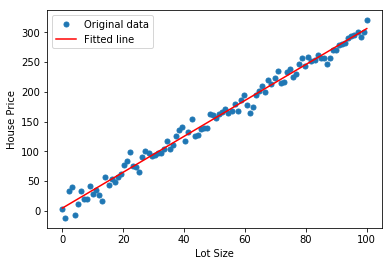

In [4]:
from data_generator import bivariable_polinomial
X, y = bivariable_polinomial([3, 4], sample_size=100, x0=0, xmax=100, mu=0, sigma=10.0)
beta = linear_regression(X, y)
fig = plt.figure()
plt.plot(X, y, 'o', label='Original data', markersize=5)
plt.plot(X, beta[0] + beta[1]*X, 'r', label='Fitted line')
plt.xlabel('Lot Size')
plt.ylabel('House Price')
fig.savefig('house_price_graph_with_line.png')
plt.legend()
plt.show()

### Gradient Descent

The minimum squares approach reduces the error in our prediction but it is not an iterative method like most machine learning algorithms are. In which at every iteration it makes a better prediction in a direction that minimizes the squared errors. Let's look at the formula of the best hyperplane $W$ to predict $y$:

$$Y= WX + b + e$$

Mathematically, our cost function, $e^2$, is dependent of $W$ and $b$:


$$ L(\hat b, \hat w) = ||e||^2$$
$$ L(\hat b, \hat w) = \sum (\hat y - y)^2$$
$$ L(\hat b, \hat w) = \sum (\hat b - x\hat w - y)^2$$
$$ L(\hat b, \hat w) = \sum (X\hat{W} - y)^T(X\hat{W} - y)$$


In which $\hat W$ is an array containing $\hat w$ and $\hat b$. The cost function for the linear regression is a convex function, therefore there is a single minimum point. To reach it, we must update simultaneously both parameters $\hat b$,$\hat w$, subtracting their respective cost partial derivatives multiplied by a learning rate $\eta$ :

$$ \hat b := \hat b - \eta \frac{\partial L(\hat b, \hat w)}{\partial \hat b} $$

$$ \hat w := \hat w - \eta \frac{\partial L(\hat b, \hat w)}{\partial \hat w} $$


So for the least squares error:

$$ \hat b := \hat b - \eta \sum 2(\hat b - x\hat w - y)$$

$$ \hat w := \hat w - \eta \sum 2((\hat b - x\hat w - y)x) $$


The Python iteration would look as follows

In [5]:
class linear_regression_gradient(object):

    def __init__(self, learning_rate=0.0001, training_iters=50):
        self.learning_rate = learning_rate
        self.training_iters = training_iters

    def fit(self, X_train, y):
            
        # format data
        if len(X_train.values.shape) < 2:
            X = X_train.values.reshape(-1,1)
        
        # add bias
        X = np.insert(X, 0, 1, 1)

        # random guess
        self.w_hat = np.random.normal(0,5, size = X[0].shape)
        aux = np.random.normal(0,5, size = X[0].shape)
        
        
        self.w_hist = []
        self.w_hist.append(self.w_hat)

        for _ in range(self.training_iters):

            gradient = np.zeros(self.w_hat.shape) # initialize gradient

            # compute for every datapoint
            for point, yi in zip(X, y):
                gradient +=  (point * self.w_hat - yi) * point

            # multiply by the learning rate
            gradient *= self.learning_rate 

            # update parameters
            self.w_hat -= gradient
            
            # save history
            self.w_hist.append(self.w_hat.copy())
            

    def predict(self, X_train):
        # format data
        if len(X_train.values.shape) < 2:
            X = X_train.values.reshape(-1,1)
        
        # add bias
        X = np.insert(X, 0, 1, 1)

        return np.dot(X, self.w_hat)
    
    def predict_hist(self, X_train, idx):
        # format data
        if len(X_train.values.shape) < 2:
            X = X_train.values.reshape(-1,1)
        
        # add bias
        X = np.insert(X, 0, 1, 1)

        return np.dot(X, self.w_hist[idx])

In [6]:
import pandas as pd
np.random.seed(0) # para consistência nos resultados

data = pd.DataFrame()
data['x'] = np.linspace(-10,10,100)
data['y'] = 5 + 3*data['x'] + np.random.normal(0,3,100)
regr = linear_regression_gradient(learning_rate=0.0005, training_iters=30)
regr.fit(data['x'], data['y'])

For every iteration, it is possible to see the fitted line getting closer and closer to the line with minimum error:

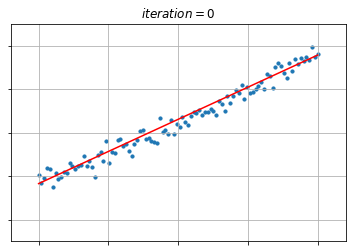

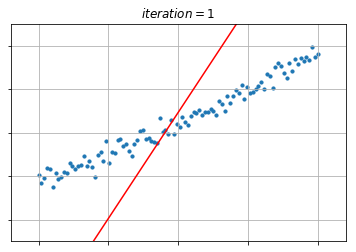

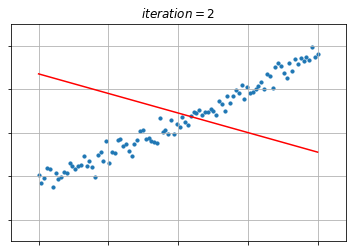

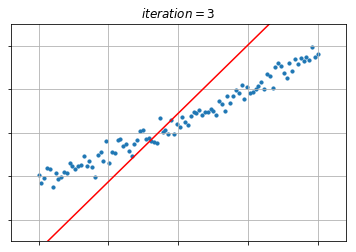

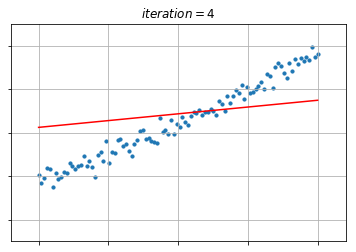

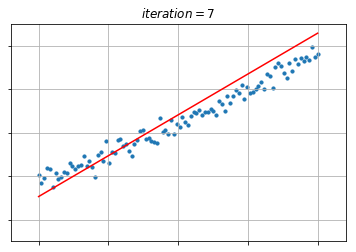

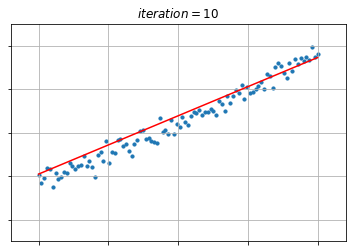

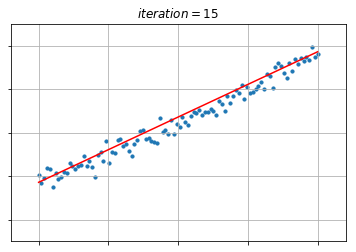

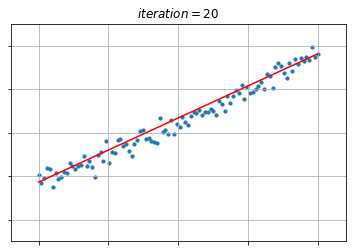

In [7]:
for idx in [0, 1, 2, 3, 4, 7, 10, 15, 20]:
    plt.scatter(data['x'], data['y'], s= 10)
    plt.ylim(-50,50)
    plt.xlim(-12,12)
    plt.plot(data['x'], regr.predict_hist(data['x'], idx), c='r')
    plt.title('$iteration = %i$' %idx)
    plt.tick_params(labelsize=9, labelleft=False, labelbottom = False)
    plt.grid(True)
    plt.show()

### Logistic Regression

Logistic Regression is an algorithm used for classification problems. In the tumor example, let’s suppose the tumor type  is solely dependent on its radius, plotting the data would give us something like:

![log](log_plot.png)
    
                                                        Figure 3 - tumor plot
                                                        
                                                        
From figure 3, it is possible to see there is a clear correlation between size and tumor type but there is no clear indicator of when the tumor becomes malignant. Similar to linear regression, we want to find a curve that best fits the data, but in this case, instead of the linear function we will use the sigmoid function:

$$ \sigma({Z}) = \frac{1}{1 + e^{{Z}}} $$

Plotting this function give us the graph below:



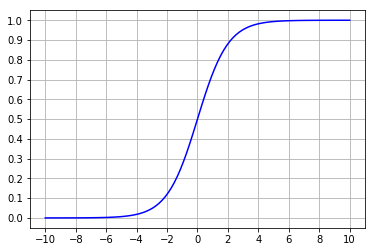

In [8]:
sigmoid = lambda x: 1 / (1 + np.exp(-x))

y = np.linspace(-10,10,100)

plt.plot(y, sigmoid(y), 'b', label='linspace(-10,10,100)')

plt.grid()
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.1))

plt.show()

For classification problems, instead of the least squares function, our cost function is the cross entropy:

$$
    J =
    \begin{cases}
        -log(\hat{y}) & \text{if $y=1$,}\\
        -log(\hat{y}) & \text{otherwise.}
    \end{cases}
$$

In matrix form

$$ J_{{X,y}_{TRUE}}({W}) = -\frac{1}{n} \sum {y}_{TRUE} \odot \log{{\hat y}}$$

The minimization of the cost function is made through the gradient descent, in which the gradient of J is:

$$ {\Delta J(W)} = - \frac{1}{n} {X}^T ({y}_{TRUE} - {\hat y}) $$

So the weights Ware updated by the equation:

$$ {W} = {W} - \eta {\Delta J(W)} $$ 


If our classification problem has more than possibilities than a binary classification, it is important to use a normalization for the exponential function, called softmax:
   
$$ Softmax({Z}) = \frac{e^{{Z}}}{\sum_{j=0}^{k-1}e^{z_{i,j}}} $$

Let’s take for example the famous iris dataset, in which we want to predict the variation of the iris flower. We will use the width of the sepal and petal to make our prediction. The dataset looks like this:


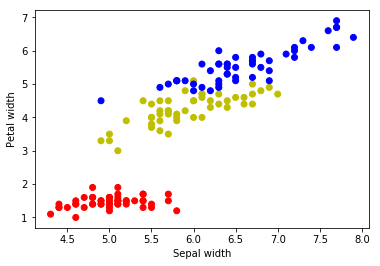

In [9]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:,::2]  # sepal and petal width are in indexes 0 e 2
Y = iris.target

X = pd.DataFrame(X, columns=['sepal width','petal width'])
y = pd.DataFrame(Y, columns=['variation'])
y['variation'] = y['variation'].astype(str)

colors = np.array(['r','y','b'])
plt.scatter(X['sepal width'], X['petal width'], c=colors[Y])
plt.xlabel('Sepal width')
plt.ylabel('Petal width')
plt.show()


In order to able to predict the variation of the flower using a logistic regression, the Python code would be as follows

In [10]:
class LogisticRegression(object):
    """LogisticRegression classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    cost_ : list
        Cost in every epoch.

    """
    def __init__(self, eta=0.01, iterations=1000):
        self.eta = eta
        self.iterations = iterations
        self.W = None    
    
    def train(self, X, y):
        
        """ Fit training data.

        Parameters
        ----------
        X : pandas DataFrame, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : pandas DataFrame, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        
        # Add the bias
        X['bias'] = 1

        #convert to numpy
        X = np.array(X)
        y = np.array(y)
                
        
        # make initial guess
        self.W = np.zeros([X.shape[1], y.shape[1]])
        self.losses = []

        for i in range(self.iterations):
            scores   = X.dot(self.W)
            y_hat    = self._softmax(scores)
            loss     = self._loss(y_hat, y)
            gradient = self.cross_entropy_gradient(X, y, y_hat)
            self.W = self.W - (self.eta * gradient)
            self.losses.append(loss)

        return self
    
    
    
    def _sigmoid(self, z):
        return 1/(1+np.exp(-z))

    def _softmax(self, z):
        if z.shape[1] > 1:
            ez = np.array(np.exp(z))
            return ez/ez.sum(axis=1, keepdims=1)
        else:
            return sigmoid(z)

    def _loss(self, y_hat, y):
        return (-1.0/y.shape[0]) * np.sum(y * np.log(y_hat))
    
    
    def cross_entropy_gradient(self, X, y, y_hat):
        return (-1.0/y.shape[0]) * (X.T).dot(y - y_hat)
                
    def predict(self,X):
        S = self._softmax(X.dot(self.W))
        # pick the highest probability class
        Y_hat = np.argmax(S,axis=1)
        return Y_hat
    

The implementation of this algorithm on the iris dataset would yield the following result

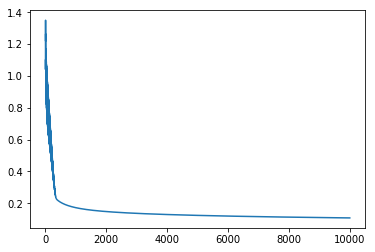

In [11]:
y = pd.get_dummies(y)
lr = LogisticRegression()
lr.eta = 0.15
lr.iterations = 10000
lr.train(X,y)
plt.plot(lr.losses)

In [12]:
pd.crosstab(lr.predict(X), Y)

col_0,0,1,2
row_0,,,
0,50,0,0
1,0,47,3
2,0,3,47


The confusion matrix gives a very good result for this simple classifier, missing only 6 predictions.

### Conclusion

The presented concepts are the basis for most of the supervised learning algorithms, even complex ones like neural networks. Those will be building blocks into learning Machine Learning.

### References

    [1] https://academic.oup.com/mind/article/LIX/236/433/986238
    [2] https://www.newyorker.com/magazine/1958/12/06/rival-2
    [3] https://www.mdpi.com/1424-8220/17/8/1847/htm
